<a href="https://colab.research.google.com/github/VincentCloud/guitar-chord-recognition/blob/main/yolo_hand_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set up YOLOv5 with PyTorch
%cd /content
! rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt  # install dependencies
!cd ..

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0 (CPU)


In [2]:
# process the input data to fit yolo training image format
import json

DATA_PATH = '/content/drive/MyDrive/Study/Fall2021/MUMT502/hand_labels'

test_name = '000015774_01_l'
pic_json = f'{DATA_PATH}/manual_train/{test_name}.json'
pic_jpg = f'{DATA_PATH}/manual_train/{test_name}.jpg'
with open(f'{DATA_PATH}/manual_train/{test_name}.json') as fjson:
  data = json.load(fjson)

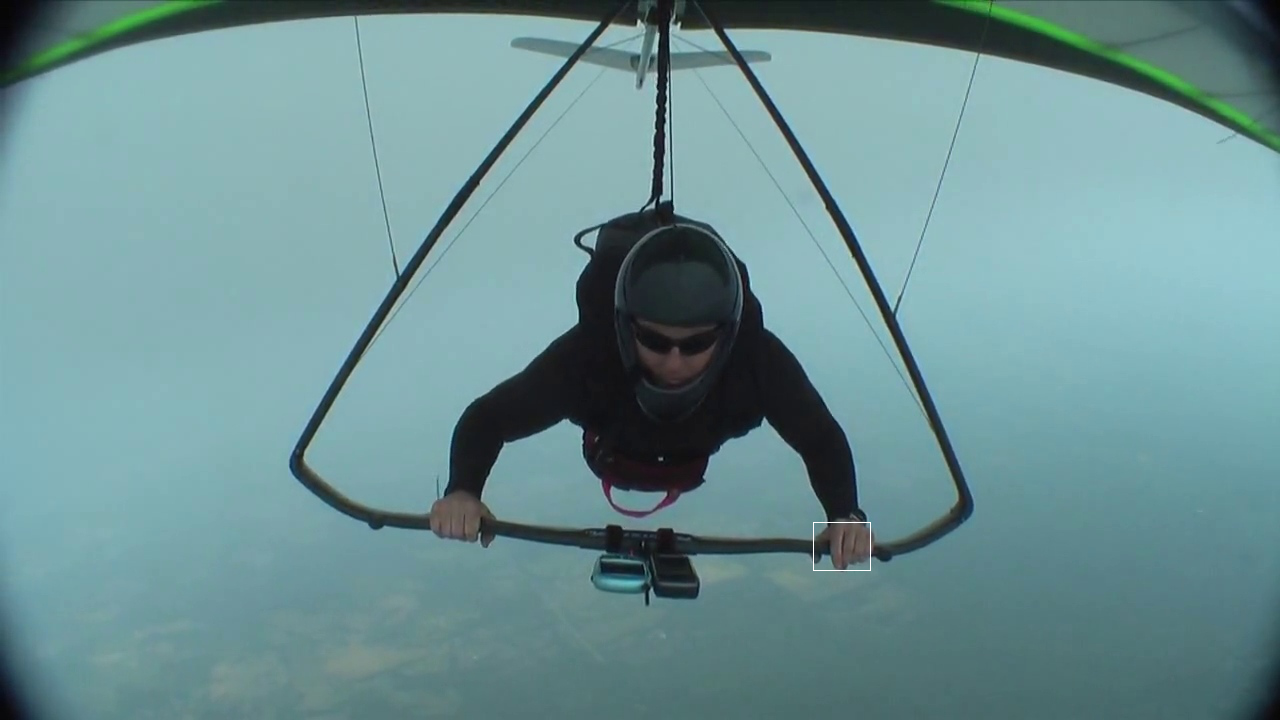

In [16]:
# 
from PIL import Image, ImageDraw

with Image.open(pic_jpg) as img:
  draw = ImageDraw.Draw(img)

  hand_pts = data['hand_pts']
  left_pt = min(hand_pts, key=lambda hand_pt: hand_pt[0])
  right_pt = max(hand_pts, key=lambda hand_pt: hand_pt[0])
  up_pt = min(hand_pts, key=lambda hand_pt: hand_pt[1])
  low_pt = max(hand_pts, key=lambda hand_pt: hand_pt[1])
  upper_left_coordinate = (left_pt[0], up_pt[1])
  lower_right_coordinate = (right_pt[0], low_pt[1])
  draw.rectangle((upper_left_coordinate, lower_right_coordinate), outline=(255, 255, 255))

  # tuple_hand_pts = tuple((hand_pt[0], hand_pt[1]) for hand_pt in hand_pts)

  # draw.point(tuple((hand_pt[0], hand_pt[1]) for hand_pt in hand_pts), fill=(255, 255, 0))
  # draw.point(((upmost_pt[0], upmost_pt[1])), fill=(255, 255, 0))


  img.show()

In [10]:
tuple(tuple(hand_pt) for hand_pt in hand_pts)

((847.1433715820314, 522.655029296875, 1.0),
 (837.4114990234374, 525.7990112304689, 1.0),
 (828.6788940429689, 528.9396362304688, 1.0),
 (813.4763793945312, 548.85498046875, 1.0),
 (817.456604003906, 562.1768188476564, 1.0),
 (838.9896850585939, 524.4890136718751, 1.0),
 (836.0963745117189, 552.2609863281251, 1.0),
 (837.9375610351561, 560.3829956054686, 1.0),
 (840.3047485351564, 570.0769653320312, 1.0),
 (853.1929321289062, 526.5850219726564, 1.0),
 (848.1954956054688, 551.2130126953125, 1.0),
 (846.3543090820311, 561.1689453125, 1.0),
 (844.7930297851562, 569.9130859375001, 1.0),
 (862.1356811523438, 530.2529907226562, 1.0),
 (860.5575561523436, 549.9030151367188, 1.0),
 (857.9273071289061, 556.4530029296876, 1.0),
 (853.1929321289062, 563.7890014648439, 1.0),
 (870.0263671874999, 534.4450073242186, 1.0),
 (869.7633666992188, 552.2609863281251, 1.0),
 (865.7988891601565, 557.3058471679688, 1.0),
 (862.3987426757814, 561.4309692382812, 1.0))

In [8]:
!pwd

/content/yolov5/yolov5
